Fake news count: 23481
Real news count: 21417


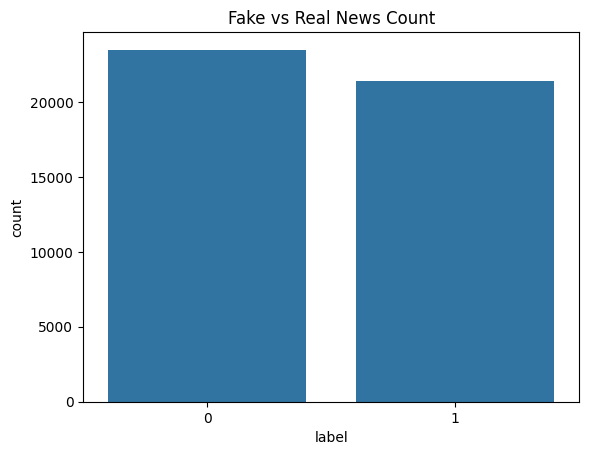

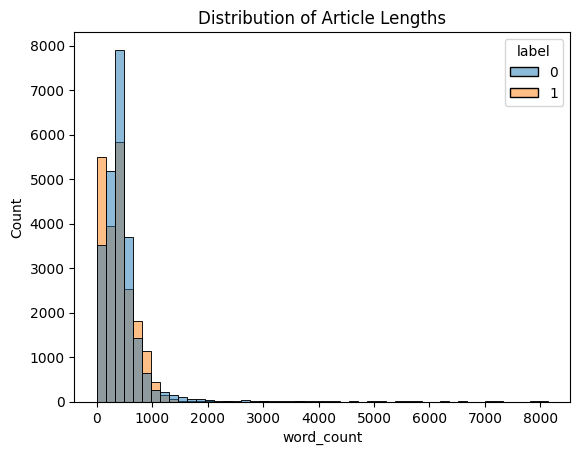

Accuracy: 0.9972160356347439

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4631
           1       1.00      1.00      1.00      4349

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Confusion Matrix:
 [[4616   15]
 [  10 4339]]

Cross-validation Accuracy Scores: [0.99877506 0.99766147 0.9986637  0.99777258 0.99766121]
Mean CV Accuracy: 0.9981068025342974


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = 0
true["label"] = 1
data = pd.concat([fake, true], axis=0).reset_index(drop=True)
data = data.sample(frac=1).reset_index(drop=True)
data.dropna(inplace=True)

data["text"] = data["title"] + " " + data["text"]
data.drop(columns=["title", "subject", "date"], inplace=True, errors="ignore")

data["text"] = data["text"].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

print("Fake news count:", data[data["label"]==0].shape[0])
print("Real news count:", data[data["label"]==1].shape[0])

sns.countplot(x="label", data=data)
plt.title("Fake vs Real News Count")
plt.show()

data["word_count"] = data["text"].apply(lambda x: len(x.split()))
sns.histplot(data=data, x="word_count", hue="label", bins=50)
plt.title("Distribution of Article Lengths")
plt.show()

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(data["text"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
